Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in
sklearn.datasets.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but recommended for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choosing k=5 as an example
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Classifier Accuracy: {accuracy:.2f}')


KNN Classifier Accuracy: 1.00


Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in
sklearn.datasets.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn_regressor.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.6575877238850522


Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using
cross-validation on load_iris dataset in sklearn.datasets.

Optimal K: 6


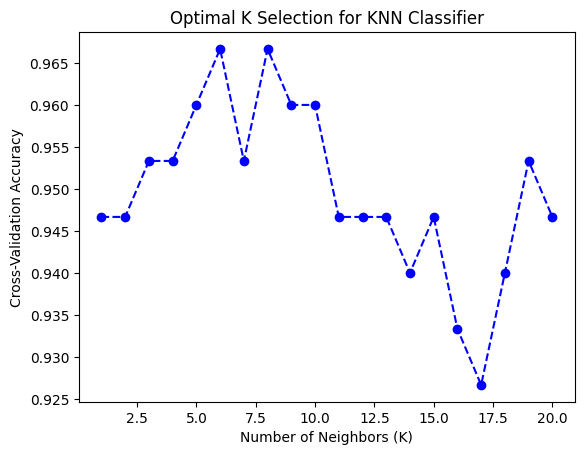

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define range of K values
k_values = range(1, 21)
cv_scores = []

# Perform cross-validation for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the optimal K (highest accuracy)
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal K: {optimal_k}")

# Plot K vs Accuracy
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Optimal K Selection for KNN Classifier")
plt.show()


Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in
sklearn.datasets.

Mean Squared Error: 0.43


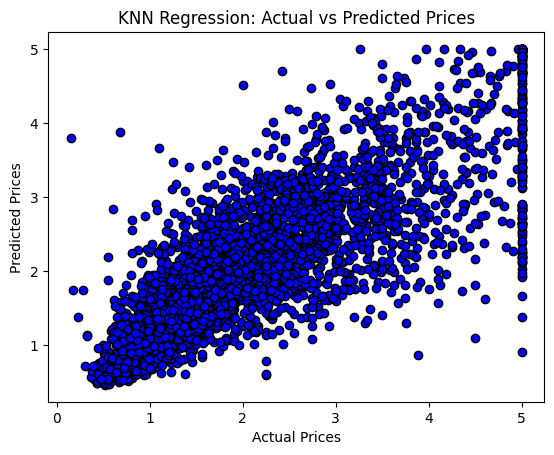

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # Using K=5
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("KNN Regression: Actual vs Predicted Prices")
plt.show()


Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on
load_iris dataset in sklearn.datasets.

Accuracy: 1.00


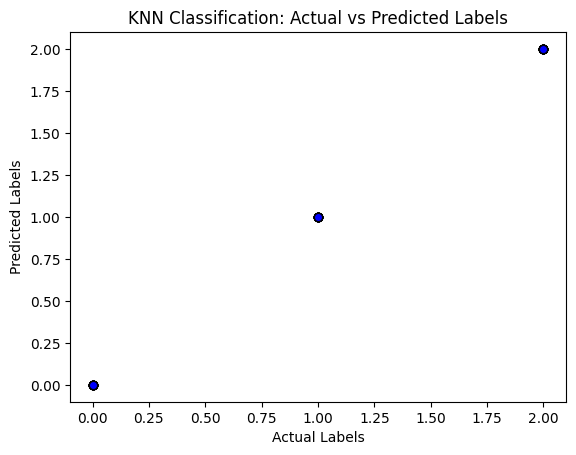

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier with weighted voting (weights='distance' gives more weight to closer neighbors)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')  # Weighted voting
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display predicted vs actual labels
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("KNN Classification: Actual vs Predicted Labels")
plt.show()


Q6. Implement a function to standardise the features before applying KNN classifier.

In [9]:
from sklearn.preprocessing import StandardScaler

def standardize_features(X_train, X_test):
    """
    Standardizes the features by scaling them to have zero mean and unit variance.

    Parameters:
    X_train (numpy array): Training dataset features
    X_test (numpy array): Testing dataset features

    Returns:
    X_train_scaled, X_test_scaled (numpy arrays): Standardized training and testing features
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

# Example usage with KNN
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
X_train_scaled, X_test_scaled = standardize_features(X_train, X_test)

# Apply KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


Q7. Write a Python function to calculate the euclidean distance between two points.

In [10]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculates the Euclidean distance between two points.

    Parameters:
    point1 (array-like): Coordinates of the first point.
    point2 (array-like): Coordinates of the second point.

    Returns:
    float: Euclidean distance between point1 and point2.
    """
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

# Example usage
pointA = [3, 4]
pointB = [6, 8]
distance = euclidean_distance(pointA, pointB)
print(f"Euclidean Distance: {distance:.2f}")


Euclidean Distance: 5.00


Q8. Write a Python function to calculate the manhattan distance between two points.

In [11]:
import numpy as np

def manhattan_distance(point1, point2):
    """
    Calculates the Manhattan distance between two points.

    Parameters:
    point1 (array-like): Coordinates of the first point.
    point2 (array-like): Coordinates of the second point.

    Returns:
    float: Manhattan distance between point1 and point2.
    """
    return np.sum(np.abs(np.array(point1) - np.array(point2)))

# Example usage
pointA = [3, 4]
pointB = [6, 8]
distance = manhattan_distance(pointA, pointB)
print(f"Manhattan Distance: {distance}")


Manhattan Distance: 7
